# Group 2 - Social media influence

##### Our names:
- Asaf Zimmer
- Ariel Shoshani 
- Amit Shavit
- Yaara Dolev

##### Data source: https://www.kaggle.com/datasets/ramjasmaurya/top-1000-social-media-channels/discussion/316761

---
1. [מבוא](#section1)
2. [אפיון העונים על השאלון](#section2)   
3. [השוואה בין מהנדסים לאנשי חינוך](#section3)
4. [השוואה בין אנשים הגרים בעיר לאנשים הגרים - כפר בשעות השימוש במדיה החברתית](#section4)
5. [בדיקת השפעת זמן השימוש במדיה על חיי המשתמשים](#section5)

<div>
<img src="https://github.com/yaaradolev/Data-Science--social-media-influence/blob/main/pic1.jpg?raw=true" width="700"/>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib.ticker import MaxNLocator


<a id='section1'></a>
## מבוא


קובץ הנתונים אותו ניתחנו עוסק בהשפעות המדיה החברתית. הקובץ הינו שאלון עליו ענו אנשים בעלי מאפיינים שונים. 
השאלות מתחלקות לדירוג היגד בין 1-5 או בחירה מרשימה באיזו תדירות מבצעים פעולות שונות. 
חוץ מאלו, נתונים המקצוע בהם עוסקים, באיזה סביבת מגורים חיים וכו'. 
בעבודתנו בחנו וניתחנו את הקשרים בין האנשים השונים ומאפיניהם ובדגש על השפעתם מהרשת החברתית.. 

In [2]:
url = 'https://raw.githubusercontent.com/yaaradolev/Data-Science--social-media-influence/main/Survey_Data%20-%20Sheet2.csv'
s_media = pd.read_csv(url)
s_media.head ()

,Please select your age (in years) below :,How often do you find that you stay online longer than you intended? [Your response],How often do your grades or school work suffer because of the amount of time you spend online? [Your response],How often does your job performance or productivity suffer because of the social media? [Your response],How often do you check your social media account before something else that you need to do? [Your response],How often do you lose sleep due to being online? [Your response],How often do you try to cut down the amount of time you spend online and fail? [Your response],"How often do you feel depressed, moody, or nervous when you are off-line, which goes away once you are back online? [Your response]","In a day, how much time do you spend on social media platforms?",How well are you able to concentrate?,Are you able to accept your bodily appearance?,How satisfied are you with the support you get from your friends?,"How often do you have negative feelings, such as blue mood, despair, anxiety, depression?",Highest level of eduaction attained :,Field of education / profession :,Type of settlement :,When did you start using social media actively?
0,18-22,Always,Often,Frequently,Often,Rarely,Occasionally,Occasionally,greater than 3 hours,3,4,4,3,12th standard,Fine Arts,Urban,3 years ago
1,18-22,Always,Often,Frequently,Always,Always,Often,Always,greater than 3 hours,2,1,1,4,12th standard,Designing,Urban,4 years ago or higher
2,18-22,Always,Always,Always,Always,Often,Rarely,Always,greater than 3 hours,1,2,3,5,12th standard,Engineering,Urban,3 years ago
3,18-22,Always,Always,Often,Always,Always,Always,Often,greater than 3 hours,3,4,5,1,12th standard,Management,Urban,4 years ago or higher
4,18-22,Always,Always,Always,Always,Always,Always,Always,greater than 3 hours,1,1,1,5,12th standard,Engineering,Rural,3 years ago


בדיקת ערכים חסרים:

In [3]:
null_counter= s_media.isnull().sum()
null_counter

Please select your  age (in years) below :                                                                                             0
How often do you find that you stay online longer than you intended?  [Your response]                                                  0
How often do your grades or school work suffer because of the amount of time you spend online?  [Your response]                        0
How often does your job performance or productivity suffer because of the social media?  [Your response]                               0
How often do you check your social media account before something else that you need to do? [Your response]                            0
How often do you lose sleep due to being online?  [Your response]                                                                      0
How often do you try to cut down the amount of time you spend online and fail? [Your response]                                         0
How often do you feel depressed, moody, o

#### לא קיימים ערכים חסרים בקובץ

In [4]:
s_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 17 columns):
 #   Column                                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                                               --------------  ----- 
 0   Please select your  age (in years) below :                                                                                           1256 non-null   object
 1   How often do you find that you stay online longer than you intended?  [Your response]                                                1256 non-null   object
 2   How often do your grades or school work suffer because of the amount of time you spend online?  [Your response]                      1256 non-null   object
 3   How often does your job performance or productivity suffer because of the social me

נציג את העמודות בלבד- השאלות עליהן ענו משתתפי המחקר

In [5]:
s_media.columns

Index(['Please select your  age (in years) below :',
       'How often do you find that you stay online longer than you intended?  [Your response]',
       'How often do your grades or school work suffer because of the amount of time you spend online?  [Your response]',
       'How often does your job performance or productivity suffer because of the social media?  [Your response]',
       'How often do you check your social media account before something else that you need to do? [Your response]',
       'How often do you lose sleep due to being online?  [Your response]',
       'How often do you try to cut down the amount of time you spend online and fail? [Your response]',
       'How often do you feel depressed, moody, or nervous when you are off-line, which goes away once you are back online? [Your response]',
       'In a day, how much time do you spend on social media platforms?',
       'How well are you able to concentrate?',
       'Are you able to accept your bodily appearan

## קורלציה

נבדוק קורלציה על מנת למצוא את הקשרים המעניינים ביותר לנתונים המספריים:

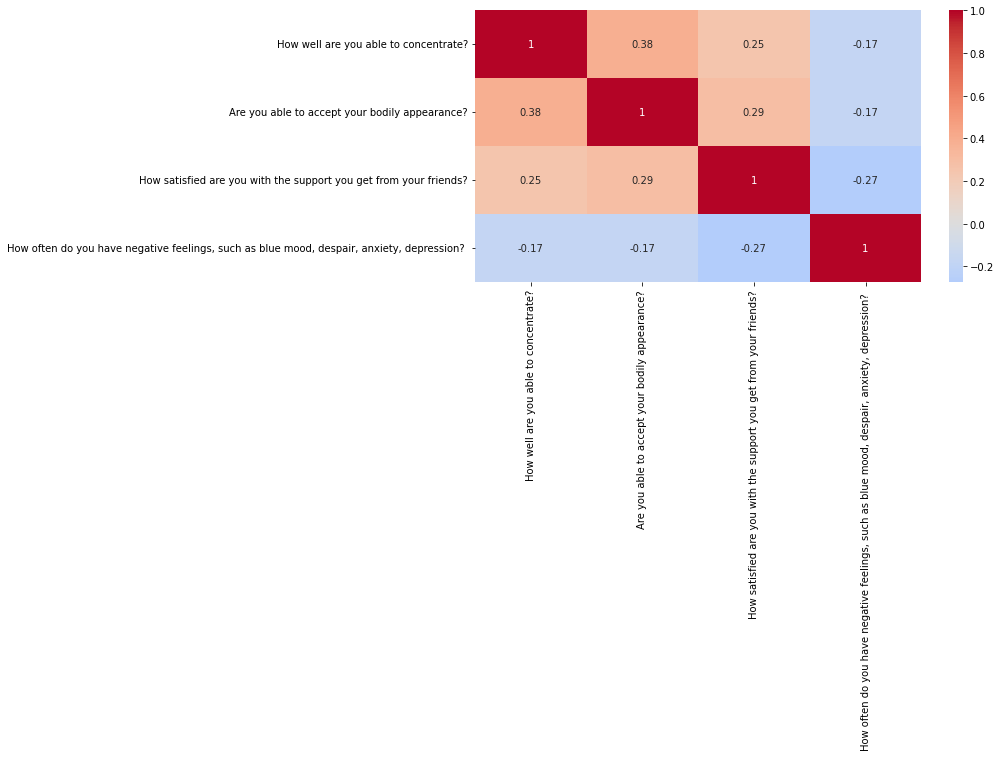

In [6]:
corrs = s_media.corr(method = 'kendall')
plt.figure(figsize=(10,5))  #figure size
sns.heatmap(corrs,cmap='coolwarm', center=0, annot = True)
plt.show ()

מכיוון שרוב הנתונים בקובץ אינם מספריים ואינם משקפים בהכרח קשרים מעניינים הקשורים בהכרח להשפעת המדיה, 
בחרנו לנתח ולהעמיק בקובץ בעצמינו, ולהציג מספר שאלות שענינו אותנו במיוחד. 


<a id='section2'></a>
## אפיון העונים על השאלון

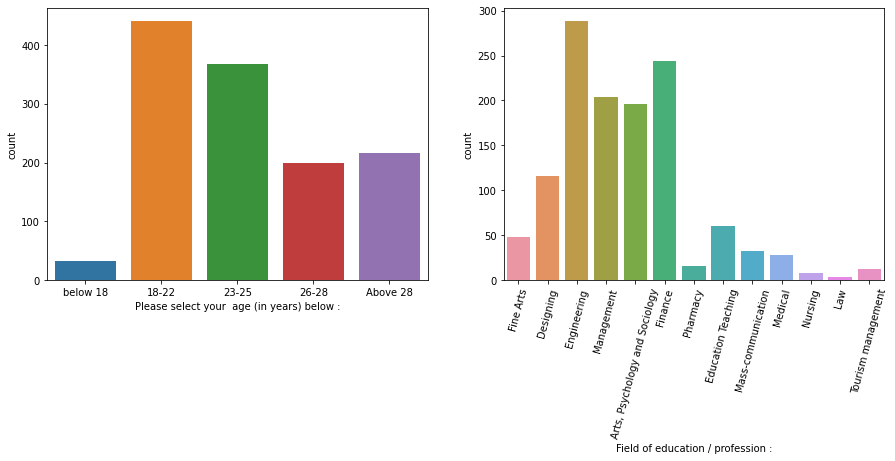

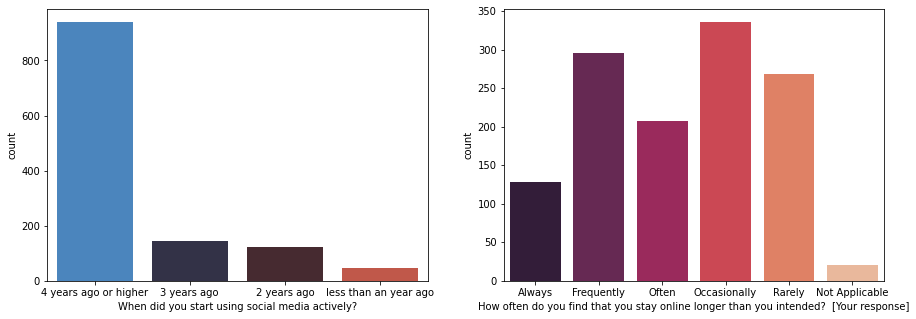

In [7]:
myorder = ["Always" , "Frequently", "Often", "Occasionally" , "Rarely" , "Not Applicable"]
my_order = ["4 years ago or higher" , "3 years ago", "2 years ago", "less than an year ago"]
my_age_order = ["below 18" , "18-22", "23-25", "26-28", "Above 28"]
fig, axes = plt.subplots(figsize=(15,5), ncols=2)
plt.xticks (rotation = 75)
sns.countplot(data = s_media, x='Please select your  age (in years) below :',ax = axes[0],order= my_age_order)
sns.countplot(data = s_media, x='Field of education / profession :', ax = axes[1]) 
plt.show()
fig, axes = plt.subplots(figsize=(15,5), ncols=2)
sns.countplot(data = s_media, x='When did you start using social media actively?',
ax = axes[0],palette='icefire',order=my_order)
sns.countplot(data = s_media,x= 'How often do you find that you stay online longer than you intended?  [Your response]',
ax = axes[1],palette='rocket', order= myorder)
plt.show()



---
<a id='section3'></a>
## השוואה בין מהנדסים לאנשי חינוך

ביצענו פילוח ספציפי בין מורים למהנדסים בנושאים הבאים:  
שאלה ראשונה- עד כמה אתה מרוצה מהתמיכה שאתה מקבל מחבריך? 
שאלה שנייה- האם אתה מסוגל לקבל את המראה הגופני שלך?
שאלה שלישית- כמה אתה מסוגל להתרכז


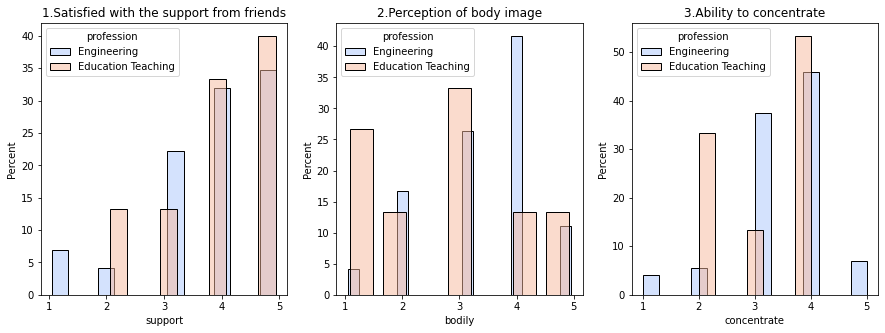

In [8]:
bothe=s_media.rename(columns={'Field of education / profession :' : 'profession'})
bothe=bothe.rename(columns={'Field of education / profession :' : 'profession','Are you able to accept your bodily appearance?': 'bodily','How satisfied are you with the support you get from your friends?': 'support', 'How well are you able to concentrate?' : 'concentrate'})
bothe=bothe.loc[(bothe.profession == 'Education Teaching') | (bothe.profession == 'Engineering')]
new_bothe = bothe.groupby('profession')[['concentrate','support','bodily','profession']].head(500)
new_bothe
fig, axes = plt.subplots(figsize=(15, 5), ncols=3)
#friends
a = sns.histplot(data = new_bothe[new_bothe.profession=='Engineering'], x='support',hue = 'profession', stat='percent',palette='coolwarm',ax = axes[0],shrink=0.7,hue_order=["Engineering", "Education Teaching"])
sns.histplot(data = new_bothe[new_bothe.profession=='Education Teaching'], x='support',hue = 'profession', stat='percent',palette='coolwarm',ax = axes[0],shrink=0.7,hue_order=["Engineering", "Education Teaching"])
#bobily
b = sns.histplot(data = new_bothe[new_bothe.profession=='Engineering'], x='bodily',hue = 'profession', stat='percent',palette='coolwarm', ax = axes[1],shrink=0.7,hue_order=["Engineering", "Education Teaching"])
sns.histplot(data = new_bothe[new_bothe.profession=='Education Teaching'], x='bodily',hue = 'profession', stat='percent',palette='coolwarm', ax = axes[1],shrink=0.7,hue_order=["Engineering", "Education Teaching"])
#concentrate
c = sns.histplot(data = new_bothe[new_bothe.profession=='Engineering'], x='concentrate',hue = 'profession', stat='percent',palette='coolwarm', ax = axes[2],hue_order=["Engineering", "Education Teaching"])
sns.histplot(data = new_bothe[new_bothe.profession=='Education Teaching'], x='concentrate',hue = 'profession', stat='percent',palette='coolwarm', ax = axes[2],hue_order=["Engineering", "Education Teaching"])
a.set_title('1.Satisfied with the support from friends')
b.set_title("2.Perception of body image")
c.set_title("3.Ability to concentrate")
plt.show()


##### התובנה המרכזית מהשוואה זו הינה כי תפיסת דימוי הגוף של מהנדסים חיובית יותר מזו של אנשי החינוך

---






<a id='section4'></a>
## השוואה בין אנשים הגרים בעיר לאנשים הגרים - כפר בשעות השימוש במדיה החברתית 

In [9]:
Urban_Rural = s_media.rename(columns={'Type of settlement : ': 'settlement','In a day, how much time do you spend on social media platforms?' : 'time'})
Urban_Rural[['settlement', 'time']]

,settlement,time
0,Urban,greater than 3 hours
1,Urban,greater than 3 hours
2,Urban,greater than 3 hours
3,Urban,greater than 3 hours
4,Rural,greater than 3 hours
...,...,...
1251,Urban,less than an hour
1252,Urban,less than an hour
1253,Urban,greater than 3 hours
1254,Urban,2 to 3 hours


על מנת לבחור את הדרך הנכונה ביותר לניתוח, נבדוק את אחוז העונים על השאלות מהעיר ומהכפר

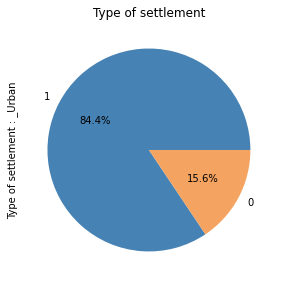

In [10]:
settlement = pd.get_dummies(data=s_media , columns= ['Type of settlement : '])
plt.figure(1,figsize=(10,10))
plt.subplot(1,2,2)
plt.title("Type of settlement")
colors = ["steelblue",'sandybrown']
settlement['Type of settlement : _Urban'].value_counts().plot.pie(autopct="%1.1f%%" , colors = colors )
plt.show ()

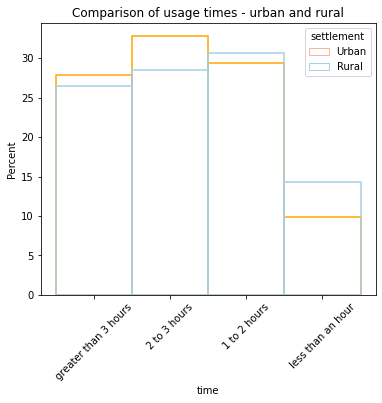

In [11]:
fig, ax = plt.subplots(figsize = (6,5))
sns.histplot(data=Urban_Rural[(Urban_Rural.settlement == 'Urban')], x="time",stat='percent',fill=False,color="orange")
sns.histplot(data=Urban_Rural[(Urban_Rural.settlement == 'Rural')],hue = 'settlement', x="time",hue_order=["Urban", "Rural"], stat='percent',fill=False,palette="RdBu")
plt.xticks(rotation=45)
plt.title("Comparison of usage times - urban and rural")
plt.show()

ההבדלים באחוזים בשעות השימוש ביום ברשתות החברתיות בין אנשים הגרים בעיר לבין הגרים בכפר:
ניתן לראות כי אכן המתגוררים בעיר בעלי אחוזים גבוהים יותר בשעות השימוש, אך ההבדלים אינם משמעותיים

---



<a id='section5'></a>
##  בדיקת השפעת זמן השימוש במדיה על חיי המשתמשים

In [12]:
s_media = s_media.rename(columns={'How satisfied are you with the support you get from your friends?': 'support',
'In a day, how much time do you spend on social media platforms?' : 'time'})   
s_media[['support', 'time']]


,support,time
0,4,greater than 3 hours
1,1,greater than 3 hours
2,3,greater than 3 hours
3,5,greater than 3 hours
4,1,greater than 3 hours
...,...,...
1251,5,less than an hour
1252,4,less than an hour
1253,3,greater than 3 hours
1254,3,2 to 3 hours


In [13]:
# s_media = s_media.rename(columns={'How satisfied are you with the support you get from your friends?': 'support', 'In a day, how much time do you spend on social media platforms?' : 'time'})   
# s_media[['support', 'time']]

s_media= s_media.rename(columns= { 'In a day, how much time do you spend on social media platforms?' : 'time',
'How satisfied are you with the support you get from your friends?': 'support',
'How often do your grades or school work suffer because of the amount of time you spend online?  [Your response]':
'work_suffer' , 'How often do you lose sleep due to being online?  [Your response]' : 'lose_sleep',
'How often do you have negative feelings, such as blue mood, despair, anxiety, depression? ':
'Frequency_of_negative_feelings'})
s_media[['work_suffer','lose_sleep','time','Frequency_of_negative_feelings','support']]

new_media=s_media.loc[(s_media.time=='less than an hour') | (s_media.time == 'greater than 3 hours')]
more_lasse = new_media.groupby('time')[['time','work_suffer','lose_sleep','Frequency_of_negative_feelings']].head(500)
more_lasse


,time,work_suffer,lose_sleep,Frequency_of_negative_feelings
0,greater than 3 hours,Often,Rarely,3
1,greater than 3 hours,Often,Always,4
2,greater than 3 hours,Always,Often,5
3,greater than 3 hours,Always,Always,1
4,greater than 3 hours,Always,Always,5
...,...,...,...,...
1249,less than an hour,Not Applicable,Rarely,3
1250,less than an hour,Not Applicable,Rarely,3
1251,less than an hour,Not Applicable,Rarely,3
1252,less than an hour,Rarely,Rarely,2


בדקנו בשלושת הפרמטרים המשפיעים ביותר על אורח החיים- הישגים בעבודה ובלימודים, איכות ושעות השינה ותדירות הופעתם של רגשות שליליים דיכאון וחרדה. 

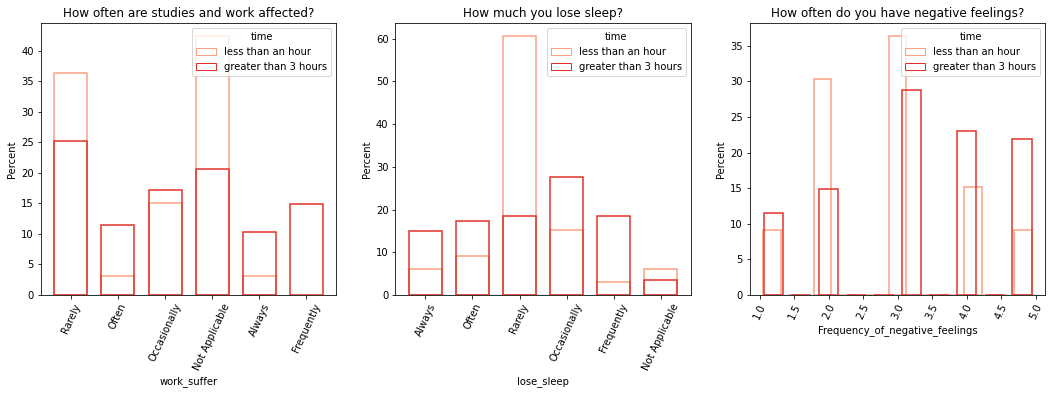

In [14]:
fig, axes = plt.subplots(figsize=(18, 5), ncols=3)
#השוואה בין יותר משלוש שעות לפחות משעה בפגיעה בעבודה ובלימודים
d=sns.histplot(data = more_lasse[more_lasse.time=='less than an hour'], x='work_suffer',hue = 'time',stat='percent',
palette='Reds',ax = axes[0],shrink=0.7,fill=False,hue_order=["less than an hour", "greater than 3 hours"])
sns.histplot(data = more_lasse[more_lasse.time=='greater than 3 hours'], x='work_suffer',hue = 'time',stat='percent',
palette='Reds',ax = axes[0],shrink=0.7,fill=False,hue_order=["less than an hour", "greater than 3 hours"])
#השוואה בין יותר משלוש שעות לפחות משעה בפגיעה בשעות שינה
e=sns.histplot(data = more_lasse[more_lasse.time=='less than an hour'], x='lose_sleep',hue = 'time',
stat='percent',palette='Reds',ax = axes[1],shrink=0.7,fill=False,hue_order=["less than an hour", "greater than 3 hours"])
sns.histplot(data = more_lasse[more_lasse.time=='greater than 3 hours']
,x='lose_sleep',hue = 'time', stat='percent',palette='Reds',ax = axes[1],shrink=0.7,fill=False,hue_order=["less than an hour", "greater than 3 hours"])
#השוואה בין יותר משלוש שעות לפחות משעה בתדירות הרגשת דיכאון ותחושות רעות
f=sns.histplot(data = more_lasse[more_lasse.time=='less than an hour'], x='Frequency_of_negative_feelings',
hue = 'time', stat='percent',palette='Reds',ax = axes[2],shrink=0.7,fill=False,hue_order=["less than an hour", "greater than 3 hours"])
sns.histplot(data = more_lasse[more_lasse.time=='greater than 3 hours'], x='Frequency_of_negative_feelings',
hue = 'time', stat='percent',palette='Reds',ax = axes[2],shrink=0.7,fill=False,hue_order=["less than an hour", "greater than 3 hours"])
for i, ax in enumerate (fig.axes):
    axes [i].tick_params (axis = 'x' ,rotation=65)
d.set_title('How often are studies and work affected?')
e.set_title("How much you lose sleep?")
f.set_title("How often do you have negative feelings?")
plt.show()

אלו המשתמשים יותר שעות- אכן סובלים יותר פגיעות באורח חייהם. 
מתבטא בפגיעה בשעות השינה, פגיעה במשימות בלימודים ובעבודה ועלייה בתחושת רגשות שליליים ודיכאון

<div>
<img src="https://github.com/yaaradolev/Data-Science--social-media-influence/blob/main/pic2.jpg?raw=true" width="650"/>
</div>